In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from plot_functions import *
from sklearn.model_selection import KFold

In [2]:
from create_matrix import *

from tensor_custom_core import *
from create_matrix import *
from tensor_custom_core import *
from degree_days import dds
appliance_index = {appliance: APPLIANCES_ORDER.index(appliance) for appliance in APPLIANCES_ORDER}

APPLIANCES = ['fridge', 'hvac', 'wm', 'mw', 'oven', 'dw']
region = "SanDiego"
year = 2014

import os


def un_normalize(x, maximum, minimum):
    return (maximum - minimum) * x + minimum

In [3]:
n_splits = 10
import sys
case=2
a=2
cost='abs'

In [4]:
def get_tensor(df, dfc):
    start, stop = 1, 13
    energy_cols = np.array(
        [['%s_%d' % (appliance, month) for month in range(start, stop)] for appliance in APPLIANCES_ORDER]).flatten()

    static_cols = ['area', 'total_occupants', 'num_rooms']
    static_df = df[static_cols]
    static_df = static_df.div(static_df.max())
    weather_values = np.array(dds[2014][region][start - 1:stop - 1]).reshape(-1, 1)

    dfc = df.copy()

    df = dfc[energy_cols]
    col_max = df.max().max()
    col_min = df.min().min()
    # df = (1.0 * (df - col_min)) / (col_max - col_min)
    tensor = df.values.reshape((len(df), 7, stop - start))
    M, N, O = tensor.shape
    return tensor

In [5]:
au_df, au_dfc = create_matrix_single_region("Austin", year)
au_tensor = get_tensor(au_df, au_dfc)

In [6]:
df, dfc = create_matrix_single_region("SanDiego", year)
tensor = get_tensor(df, dfc)
static_sd = df[['area','total_occupants','num_rooms']]
static_sd = static_sd.div(static_sd.max()).values

In [7]:
from sklearn.model_selection import train_test_split, KFold

In [8]:
n_splits = 10


In [9]:
from common import compute_rmse

In [10]:
np.arange(0.1, 1.0, 0.1)

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

In [13]:
pred = {}
sd = {}
out = {}
n_splits = 10
NUM_RANDOM = 3
n_iter=1200
TRAIN_SPLITS = range(10, 110, 40)
case = 2
num_home=5

cost = 'l21'
algo = 'adagrad'
for static_fac in ['static',None]:
    if static_fac is None:
        H_known_Sd = None
    else:
        H_known_Sd = static_sd    
    np.random.seed(0)
    pred[static_fac] = {}
    for lam in [1e-3, 1e-2, 1e-1, 0, 1]:
        pred[static_fac][lam] = {}
        for a in range(2, 3):

            pred[static_fac][lam][a] = {}
            for random_seed in range(NUM_RANDOM):
                pred[static_fac][lam][a][random_seed] = {}
                for appliance in APPLIANCES_ORDER:
                    pred[static_fac][lam][a][random_seed][appliance] = {f:[] for f in TRAIN_SPLITS}

            kf = KFold(n_splits=n_splits)
            for random_seed in range(NUM_RANDOM):

                for train_percentage in TRAIN_SPLITS:
                    print(lam, static_fac, a, random_seed,train_percentage)
                    for train_max, test in kf.split(df):

                        num_train = int((train_percentage*len(train_max)/100)+0.5)
                        if train_percentage==100:
                            train = train_max
                        else:
                            train, _ = train_test_split(train_max, train_size = train_percentage/100.0, random_state=random_seed)
                        train_ix = df.index[train]
                        test_ix = df.index[test]

                        num_test = len(test_ix)
                        train_test_ix = np.concatenate([test_ix, train_ix])
                        df_t, dfc_t = df.ix[train_test_ix], dfc.ix[train_test_ix]
                        tensor = get_tensor(df_t, dfc_t)
                        tensor_copy = tensor.copy()
                        # First n
                        tensor_copy[:num_test, 1:, :] = np.NaN
                        if static_fac is not None:
                            H, A, T, Hs, As, Ts, HATs, costs = learn_HAT_adagrad(case, tensor_copy, num_home, a, num_iter=n_iter, lr=1, dis=False, cost_function=cost, H_known=H_known_Sd[np.concatenate([test, train])], penalty_coeff=lam)
                        else:
                            H, A, T, Hs, As, Ts, HATs, costs = learn_HAT_adagrad(case, tensor_copy, num_home, a, num_iter=n_iter, lr=1, dis=False, cost_function=cost, penalty_coeff=lam)

                        HAT = multiply_case(H, A, T, case)
                        for appliance in APPLIANCES_ORDER:
                            pred[static_fac][lam][a][random_seed][appliance][train_percentage].append(pd.DataFrame(HAT[:num_test, appliance_index[appliance], :], index=test_ix))


(0.001, 'static', 2, 0, 10)
(0.001, 'static', 2, 0, 50)
(0.001, 'static', 2, 0, 90)
(0.001, 'static', 2, 1, 10)
(0.001, 'static', 2, 1, 50)
(0.001, 'static', 2, 1, 90)
(0.001, 'static', 2, 2, 10)
(0.001, 'static', 2, 2, 50)
(0.001, 'static', 2, 2, 90)
(0.01, 'static', 2, 0, 10)
(0.01, 'static', 2, 0, 50)
(0.01, 'static', 2, 0, 90)
(0.01, 'static', 2, 1, 10)
(0.01, 'static', 2, 1, 50)
(0.01, 'static', 2, 1, 90)
(0.01, 'static', 2, 2, 10)
(0.01, 'static', 2, 2, 50)
(0.01, 'static', 2, 2, 90)
(0.1, 'static', 2, 0, 10)
(0.1, 'static', 2, 0, 50)
(0.1, 'static', 2, 0, 90)
(0.1, 'static', 2, 1, 10)
(0.1, 'static', 2, 1, 50)
(0.1, 'static', 2, 1, 90)
(0.1, 'static', 2, 2, 10)
(0.1, 'static', 2, 2, 50)
(0.1, 'static', 2, 2, 90)
(0, 'static', 2, 0, 10)
(0, 'static', 2, 0, 50)
(0, 'static', 2, 0, 90)
(0, 'static', 2, 1, 10)
(0, 'static', 2, 1, 50)
(0, 'static', 2, 1, 90)
(0, 'static', 2, 2, 10)
(0, 'static', 2, 2, 50)
(0, 'static', 2, 2, 90)
(1, 'static', 2, 0, 10)
(1, 'static', 2, 0, 50)
(1, 'st

In [14]:
from common import compute_rmse_fraction

In [15]:
out = {}
algo = 'adagrad'
for static_fac in ['static',None]:
    out[static_fac] = {}
    for lam in [1e-3, 1e-2, 1e-1, 0, 1]:
        out[static_fac][lam] = {}
        for a in range(2, 3):
            out[static_fac][lam][a] = {}
            for random_seed in range(NUM_RANDOM):
                out[static_fac][lam][a][random_seed] = {}

                for appliance in APPLIANCES_ORDER[1:]:
                    out[static_fac][lam][a][random_seed][appliance] = {}
                    for f in TRAIN_SPLITS:
                        s = pd.concat(pred[static_fac][lam][a][random_seed][appliance][f]).ix[df.index]
                        if appliance=="hvac":
                            out[static_fac][lam][a][random_seed][appliance][f] = compute_rmse_fraction(appliance,s[range(4, 10)],'SanDiego')[2]
                        else:   
                            out[static_fac][lam][a][random_seed][appliance][f] = compute_rmse_fraction(appliance, s,'SanDiego')[2]

    

/Users/nipunbatra/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  from ipykernel import kernelapp as app


In [32]:
import pickle
pickle.dump(out, open('predictions/normal-sparse-static.pkl','w'))

5.61459454882
5.927593897
6.12601109192
6.39226779683
5.71690566525


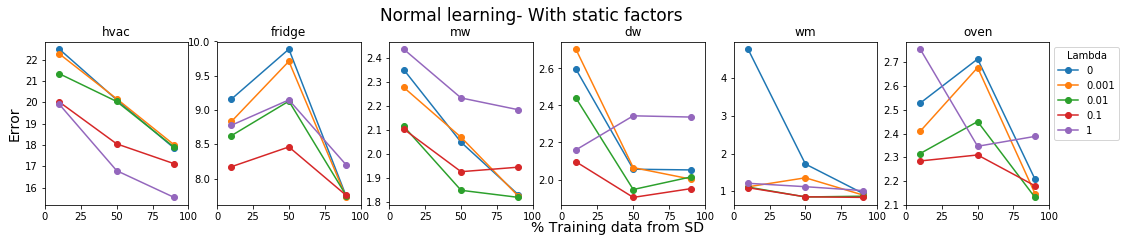

In [30]:
static_res = {}
fig, ax = plt.subplots(ncols=6, figsize=(18, 3))

for lam in [0, 1e-3, 1e-2, 1e-1, 1]:
    static_res[lam] = pd.Panel(out['static'][lam][2]).mean(axis=0)
    for i, appliance in enumerate(APPLIANCES_ORDER[1:]):
        static_res[lam][appliance].plot(ax=ax[i], marker='o', title=appliance)
        ax[i].set_xlim((0, 100))
plt.legend([0, 1e-3, 1e-2, 1e-1, 1], bbox_to_anchor=(1, 1), title='Lambda')
fig.text(0.5, 0, "% Training data from SD", fontsize=14)
ax[0].set_ylabel("Error", fontsize=14)

print static_res[0.1].mean().mean()
print static_res[0.01].mean().mean()
print static_res[0.001].mean().mean()
print static_res[0.0].mean().mean()
print static_res[1].mean().mean()
plt.suptitle("Normal learning- With static factors", fontsize=17,y=1.04)


5.29569115205
5.29331341176
5.40300182878
5.69381795578
5.50673501027


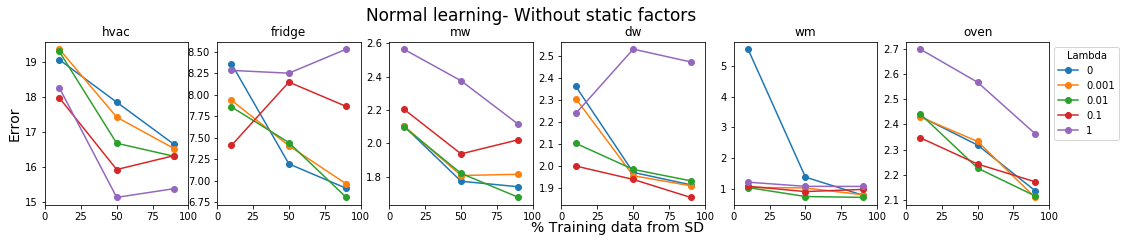

In [31]:
static_res = {}
fig, ax = plt.subplots(ncols=6, figsize=(18, 3))

for lam in [0, 1e-3, 1e-2, 1e-1, 1]:
    static_res[lam] = pd.Panel(out[None][lam][2]).mean(axis=0)
    for i, appliance in enumerate(APPLIANCES_ORDER[1:]):
        static_res[lam][appliance].plot(ax=ax[i], marker='o', title=appliance)
        ax[i].set_xlim((0, 100))
plt.legend([0, 1e-3, 1e-2, 1e-1, 1], bbox_to_anchor=(1, 1), title='Lambda')
fig.text(0.5, 0, "% Training data from SD", fontsize=14)
ax[0].set_ylabel("Error", fontsize=14)
plt.suptitle("Normal learning- Without static factors", fontsize=17,y=1.04)

print static_res[0.1].mean().mean()
print static_res[0.01].mean().mean()
print static_res[0.001].mean().mean()
print static_res[0.0].mean().mean()
print static_res[1].mean().mean()
